In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stat
import scipy.stats as st
from matplotlib import pyplot as plt

Q-3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the
data and calculate the following
https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_
a. Measure the dispersion in both and interpret the results.
b. Calculate mean and 5% confidence interval and plot it in a graph
c. Calculate the Mean absolute deviation and Standard deviation and interpret
the results.
d. Calculate the correlation coefficient and check the significance of it at 1% level
of significance.

In [8]:
df= pd.read_csv('/content/data.csv')
df.head

<bound method NDFrame.head of     Patient ID   Blood Pressure Before (mmHg)   Blood Pressure After (mmHg)
0            1                            130                           120
1            2                            142                           135
2            3                            120                           118
3            4                            135                           127
4            5                            148                           140
..         ...                            ...                           ...
95          96                            136                           129
96          97                            143                           137
97          98                            127                           123
98          99                            139                           135
99         100                            135                           130

[100 rows x 3 columns]>

In [12]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

In [24]:
before= df[' Blood Pressure Before (mmHg)']
after= df[' Blood Pressure After (mmHg)']

<Axes: xlabel=' Blood Pressure Before (mmHg)', ylabel='Count'>

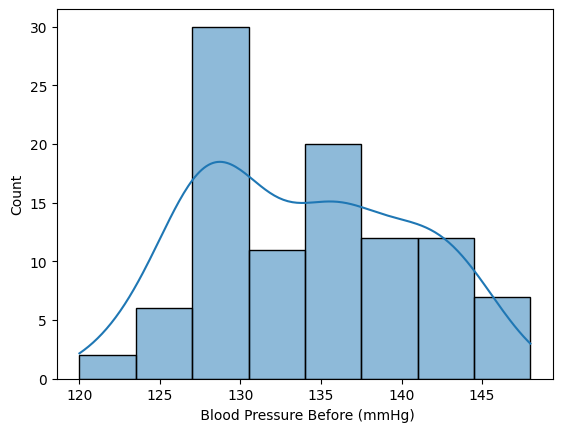

In [25]:
sns.histplot(before, kde= True)

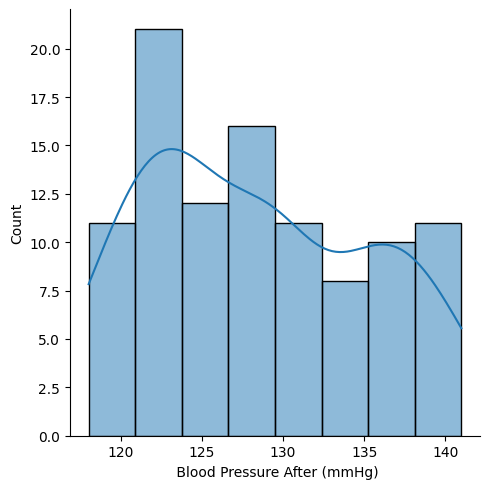

In [26]:
sns.displot(after, kde= True)

In [14]:
df.describe()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
count,100.000000,100.000000,100.000000
mean,50.500000,133.910000,128.360000
std,29.011492,6.598278,6.888022
min,1.000000,120.000000,118.000000
25%,25.750000,128.000000,123.000000
50%,50.500000,135.000000,128.000000
75%,75.250000,139.250000,135.000000
max,100.000000,148.000000,141.000000


In [27]:
before.mean()

133.91

In [28]:
after.mean()

128.36

In [29]:
np.std(before,ddof=1)

6.598278012275076

In [31]:
np.std(after, ddof=1)

6.888022102523226

The standard deviation for before is less than that of after.
Mean of before is 133.91 mmHg and after is 128.36 mmHg.

In [37]:
st.t.interval(confidence=0.05, df=len(before)-1,
              loc=np.mean(before),
              scale=st.sem(before))
# 5% confidence interval

(133.8685192966814, 133.9514807033186)

In [38]:
st.t.interval(confidence=0.05, df=len(after)-1,
              loc=np.mean(after),
              scale=st.sem(after))
# 5% confidence interval

(128.3166977928552, 128.40330220714483)

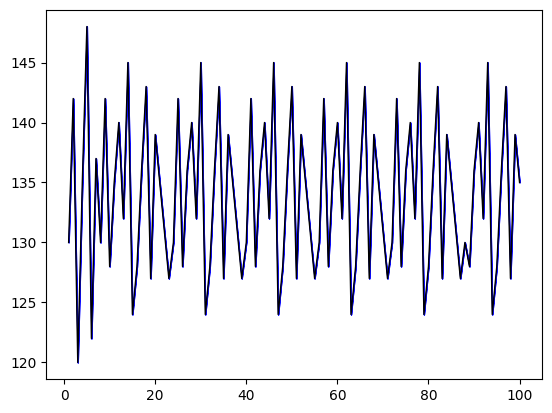

<Figure size 2600x1500 with 0 Axes>

In [53]:
x= df['Patient ID']
y= before
# Define the confidence interval
ci = 0.1 * np.std(y) / np.mean(y)
plt.plot(x, y, color='black', lw=1)

plt.fill_between(x, (y-ci), (y+ci), color='blue', alpha=0.95)
plt.figure(figsize=(26,15))
plt.show()

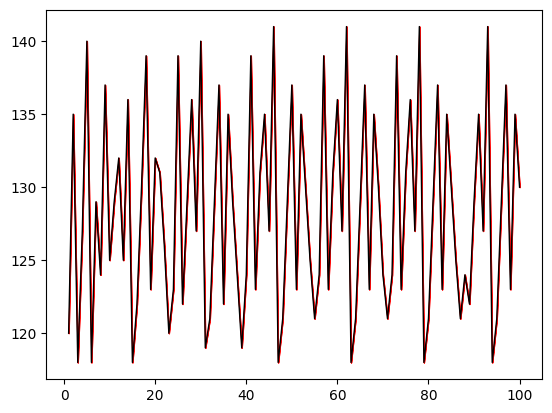

<Figure size 2600x1500 with 0 Axes>

In [52]:
x= df['Patient ID']
y= after
# Define the confidence interval
ci = 0.1 * np.std(y) / np.mean(y)
plt.plot(x, y, color='black', lw=1)

plt.fill_between(x, (y-ci), (y+ci), color='red', alpha=0.95)
plt.figure(figsize=(26,15))
plt.show()

In [54]:
df.mad() #  MAD is defined as average distance between each value and mean.

<ipython-input-54-9d6954358b36>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df.mad()


Patient ID                       25.0000
 Blood Pressure Before (mmHg)     5.7118
 Blood Pressure After (mmHg)      5.9000
dtype: float64

In [60]:
np.std(df['Patient ID'])

28.86607004772212

In [58]:
np.std(before)

6.56520372875054

In [59]:
np.std(after)

6.853495458523336

In [65]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr = pearsonr(before, after)
corr

PearsonRResult(statistic=0.9779485966556017, pvalue=1.8097381433068578e-68)

We can see that the two variables are positively correlated and that the correlation is 0.97. This suggests a high level of correlation. The two tailed p-value is a very small number and close to 0.
For significance level alpha= 0.01, the p-value is smaller than the alpha.

Q-6. A pharmaceutical company is developing a drug that is supposed to reduce blood
pressure. They conduct a clinical trial with 100 patients and record their blood
pressure before and after taking the drug. The company wants to know if the change
in blood pressure follows a normal distribution.
https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

In [66]:
df['change']= before-after

In [67]:
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg),change
0,1,130,120,10
1,2,142,135,7
2,3,120,118,2
3,4,135,127,8
4,5,148,140,8


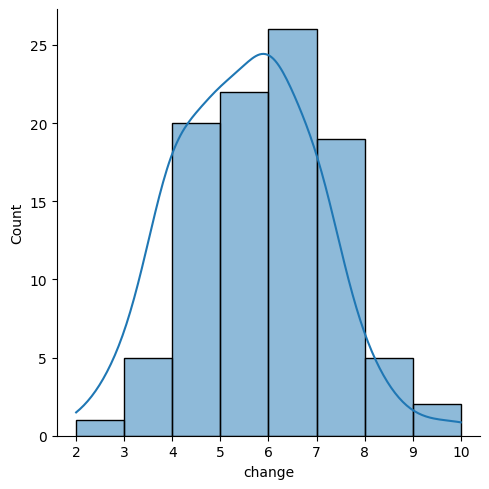

In [68]:
sns.displot(df['change'], kde= True)

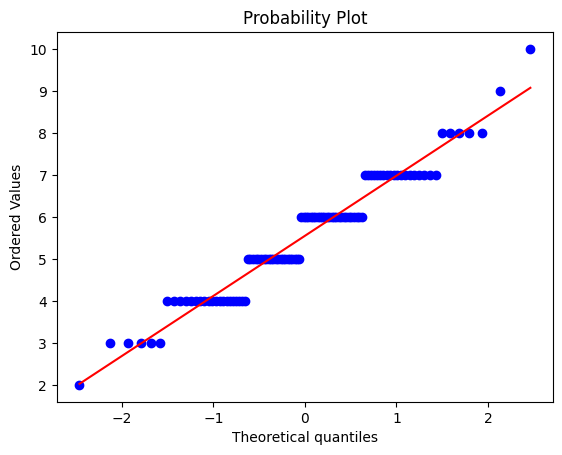

In [75]:
import scipy.stats as st
import pylab as py
st.probplot(df['change'], dist="norm", plot=py)
py.show()

Q-11. Given the data of a feature contributing to different classeshttps://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp
=share_
a. Check whether the distribution of all the classes are the same or not.
b. Check for the equality of variance/
c. Which amount LDA and QDA would perform better on this data for
classification and why.
d. Check the equality of mean for between all the classes.

The distribution of all the classes are not the same.

In [76]:

import numpy as np
import scipy.stats
  
# data
group1 = df[' Blood Pressure Before (mmHg)']
group2 = df[' Blood Pressure After (mmHg)']
  
# converting the list to array
x = np.array(group1)
y = np.array(group2)
  
# calculate variance of each group
print(np.var(group1), np.var(group2))
  
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = x.size-1
    dun = y.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value
  
# perform F-test
f_test(x, y)

43.10189999999999 46.97039999999999


(0.9176396198456901, 0.6651117087706854)

LDA will perform better here.
LDA (Linear Discriminant Analysis) is used when a linear boundary is required between classifiers and QDA (Quadratic Discriminant Analysis) is used to find a non-linear boundary between classifiers. LDA and QDA work better when the response classes are separable and distribution of X=x for all class is normal.

In [92]:
st.ttest_ind(a=before, b=after, equal_var=True)

Ttest_indResult(statistic=5.818552457956588, pvalue=2.3565868442709904e-08)